In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from n_network import NeuralNetwork

In [2]:
def load_and_preprocess_mnist():
    """
    Load and preprocess MNIST dataset.
    
    Returns:
    --------
    X_train, X_test, y_train, y_test : numpy arrays
        Preprocessed and split dataset
    """
    print("Loading MNIST dataset...")
    
    # Load MNIST
    mnist = fetch_openml('mnist_784', version=1, parser='auto')
    X, y = mnist.data.to_numpy(), mnist.target.to_numpy().astype(int)
    
    # Use subset for faster training (remove this line to use full dataset)
    X, _, y, _ = train_test_split(X, y, train_size=10000, random_state=42, stratify=y)
    
    # Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"Train samples: {X_train.shape[0]}")
    print(f"Test samples: {X_test.shape[0]}")
    
    # Normalize pixel values to [0, 1]
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    # Transpose to match network input format (features, samples)
    X_train = X_train.T
    X_test = X_test.T
    
    # One-hot encode labels
    def one_hot_encode(y, num_classes=10):
        one_hot = np.zeros((num_classes, y.shape[0]))
        one_hot[y, np.arange(y.shape[0])] = 1
        return one_hot
    
    y_train = one_hot_encode(y_train)
    y_test = one_hot_encode(y_test)
    
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_test shape: {y_test.shape}")
    
    return X_train, X_test, y_train, y_test

In [3]:
def visualize_samples(X_train, y_train, n_samples=10):
    """Visualize some training samples."""
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    fig.suptitle('Sample Training Images', fontsize=16, fontweight='bold')
    
    for i, ax in enumerate(axes.flat):
        # Reshape from (784,) to (28, 28)
        image = X_train[:, i].reshape(28, 28)
        label = np.argmax(y_train[:, i])
        
        ax.imshow(image, cmap='gray')
        ax.set_title(f'Label: {label}', fontsize=12)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

In [4]:
def test_predictions(model, X_test, y_test, n_samples=10):
    """Visualize model predictions on test samples."""
    predictions = model.predict(X_test)
    true_labels = np.argmax(y_test, axis=0)
    
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    fig.suptitle('Model Predictions on Test Set', fontsize=16, fontweight='bold')
    
    for i, ax in enumerate(axes.flat):
        image = X_test[:, i].reshape(28, 28)
        pred = predictions[i]
        true = true_labels[i]
        
        ax.imshow(image, cmap='gray')
        color = 'green' if pred == true else 'red'
        ax.set_title(f'Pred: {pred} | True: {true}', 
                    fontsize=12, color=color, fontweight='bold')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

Neural Network from Scratch - MNIST Classification

Loading MNIST dataset...
Train samples: 8000
Test samples: 2000
X_train shape: (784, 8000)
y_train shape: (10, 8000)
X_test shape: (784, 2000)
y_test shape: (10, 2000)

Visualizing sample images...


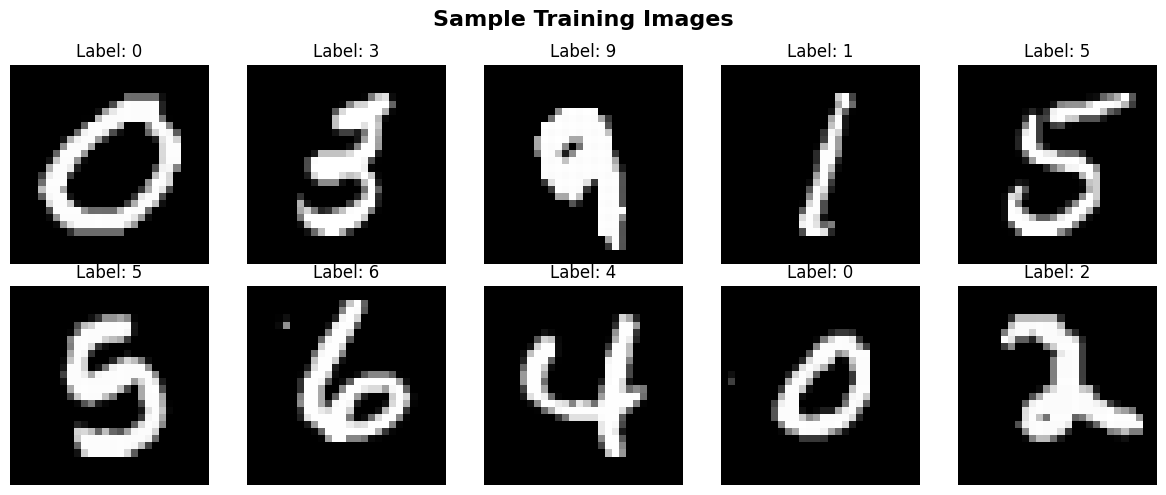


Creating Neural Network...
NeuralNetwork(architecture=[784, 128, 64, 10], activation='relu')



In [5]:
"""Main function to run the neural network test."""
print("="*60)
print("Neural Network from Scratch - MNIST Classification")
print("="*60)
print()
    
    # Load and preprocess data
X_train, X_test, y_train, y_test = load_and_preprocess_mnist()
    
# Visualize some samples
print("\nVisualizing sample images...")
visualize_samples(X_train, y_train)
    
    # Create neural network
    # Architecture: 784 input -> 128 hidden -> 64 hidden -> 10 output
print("\nCreating Neural Network...")
architecture = [784, 128, 64, 10]
model = NeuralNetwork(architecture=architecture, activation='relu')
print(model)
print()

In [6]:
    # Train the network
print("Training Neural Network...")
print("-" * 60)
model.fit(
    X_train, y_train, 
    X_test, y_test,
    lr=0.1,      # Learning rate
    epochs=500   # Number of epochs
    )
print("-" * 60)
print()

Training Neural Network...
------------------------------------------------------------


Training:   0%|          | 0/500 [00:00<?, ?it/s]

Epoch    0 | Cost: 2.3864 | Train Acc: 0.1281 | Test Acc: 0.1300


Training:  21%|██▏       | 107/500 [00:02<00:10, 38.57it/s]

Epoch  100 | Cost: 0.3512 | Train Acc: 0.9061 | Test Acc: 0.8910


Training:  42%|████▏     | 209/500 [00:05<00:07, 39.76it/s]

Epoch  200 | Cost: 0.2562 | Train Acc: 0.9285 | Test Acc: 0.9095


Training:  61%|██████▏   | 307/500 [00:07<00:04, 38.72it/s]

Epoch  300 | Cost: 0.2095 | Train Acc: 0.9425 | Test Acc: 0.9150


Training:  81%|████████  | 406/500 [00:10<00:02, 38.87it/s]

Epoch  400 | Cost: 0.1776 | Train Acc: 0.9533 | Test Acc: 0.9205


Training: 100%|██████████| 500/500 [00:12<00:00, 38.94it/s]


✓ Training completed!
Final Cost: 0.1533
Final Train Accuracy: 0.9603
Final Test Accuracy: 0.9230
------------------------------------------------------------



In [7]:
# Evaluate on test set
print("Evaluating on test set...")
test_accuracy = model.accuracy(X_test, y_test)
print(f"Final Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print()

Evaluating on test set...
Final Test Accuracy: 0.9230 (92.30%)



Plotting training curves...


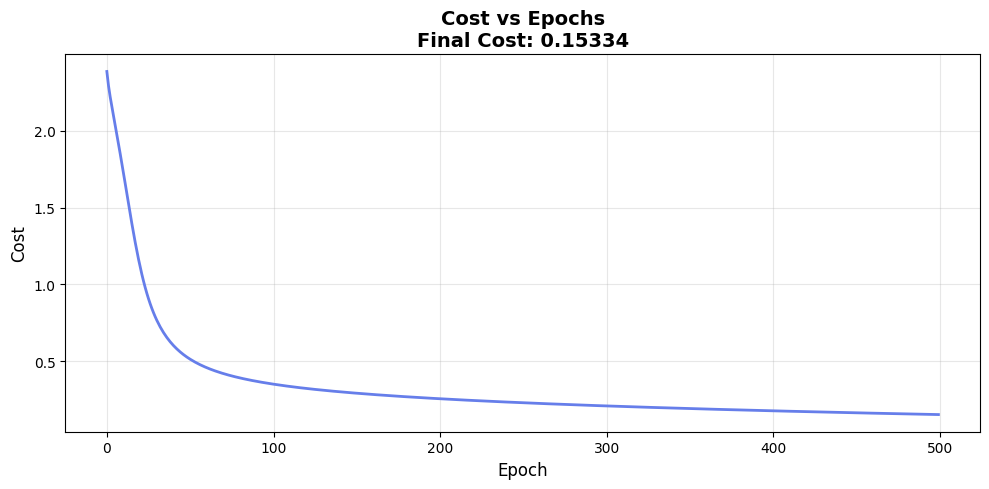

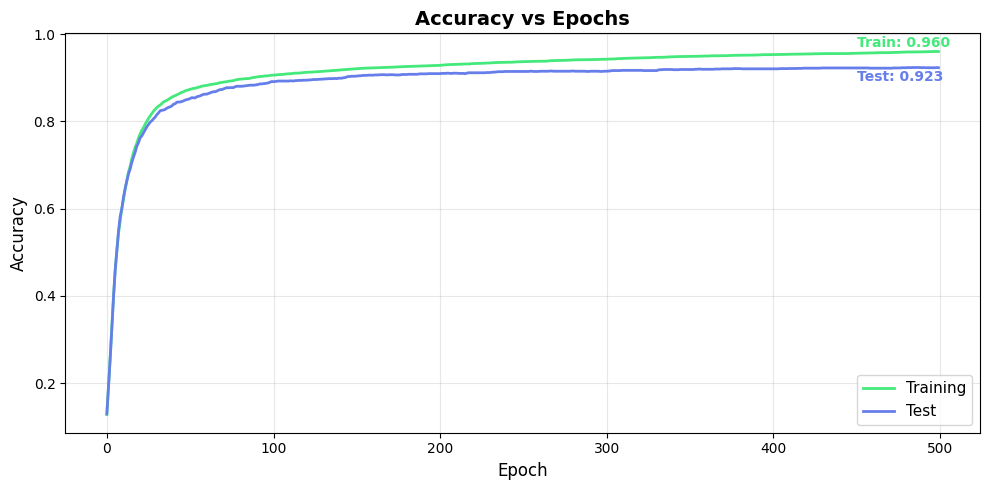

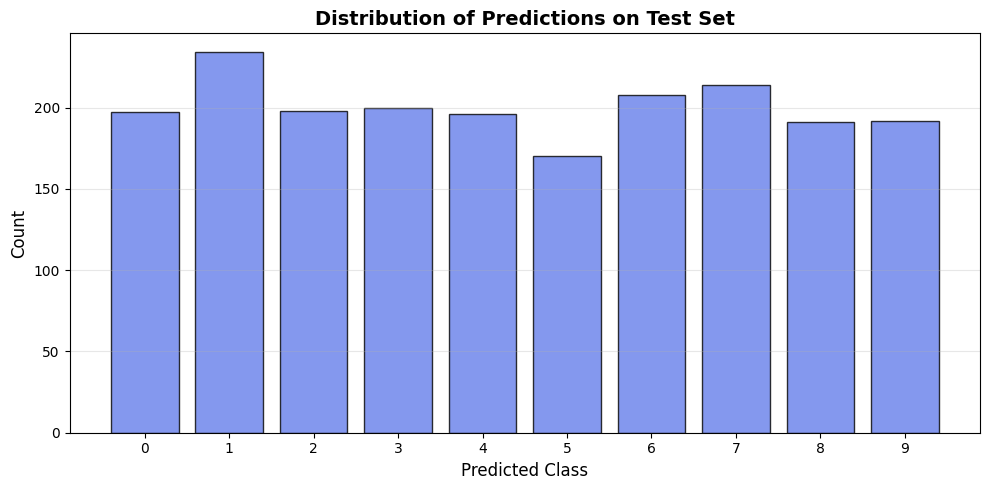

In [8]:
    # Plot training curves
print("Plotting training curves...")
model.plot_cost()
model.plot_accuracies()
model.plot_predictions_distribution()

Visualizing predictions...


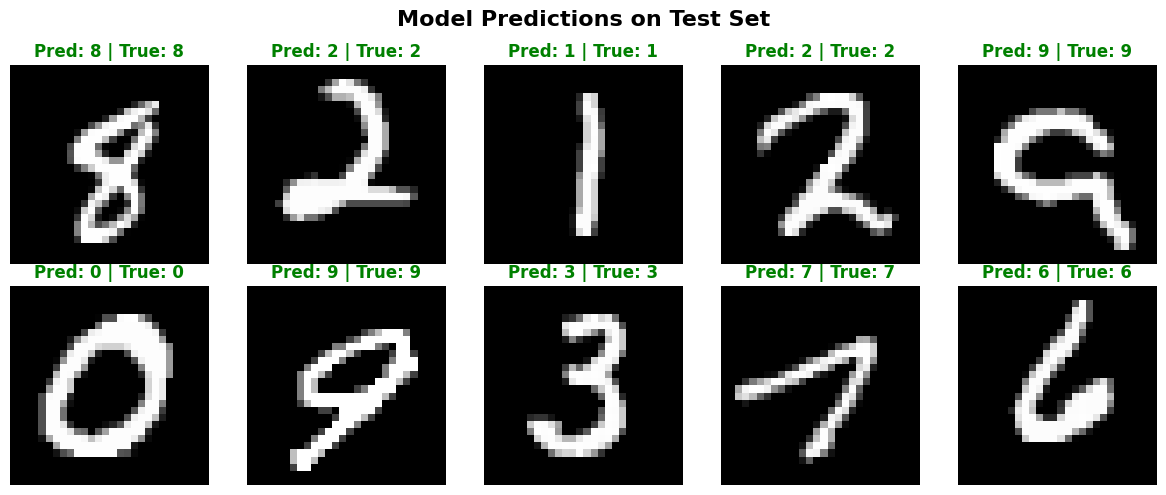

In [9]:
print("Visualizing predictions...")
test_predictions(model, X_test, y_test)